In [24]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Basic info about dataset
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# TotalCharges should be numeric — convert and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Drop customerID — it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Reset index (optional)
df.reset_index(drop=True, inplace=True)

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


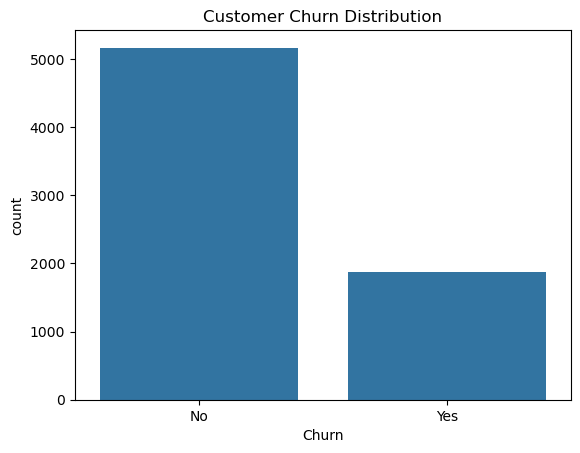


Churn Percentage:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


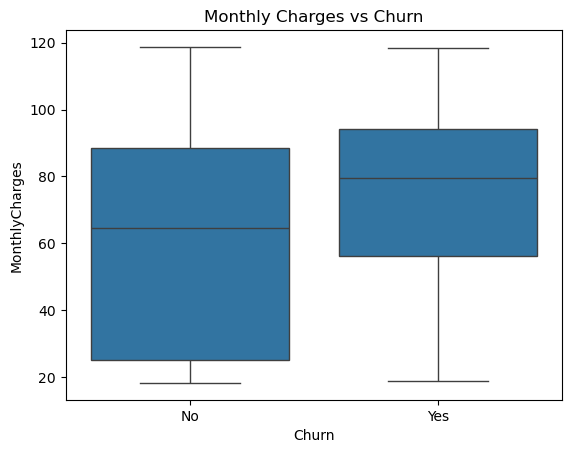

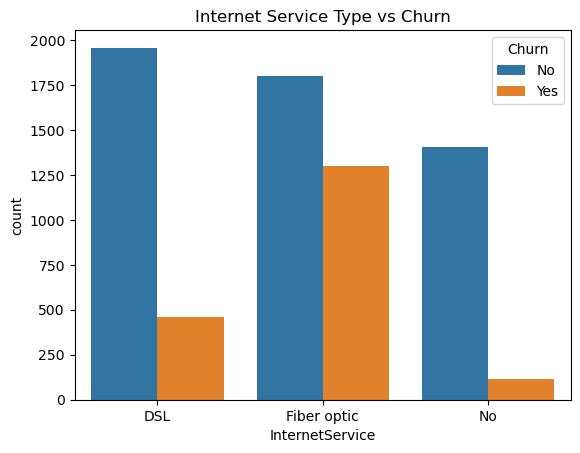

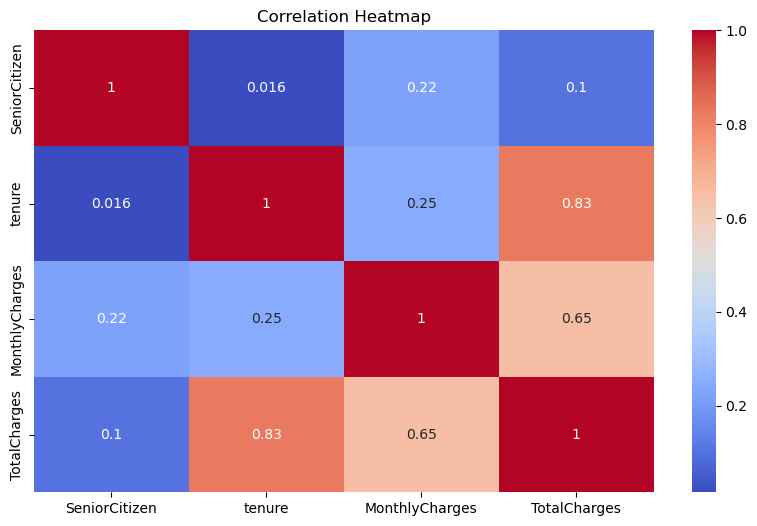

In [26]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Percentage of Churned customers
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage:\n", churn_rate)

# Compare MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service Type vs Churn")
plt.show()

# Heatmap for numeric correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Copy of original DataFrame
df_model = df.copy()

# Convert 'Yes'/'No' and similar columns to numeric using Label Encoding
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Use one-hot encoding for other categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

# Define X (features) and y (target)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 5625
Testing samples: 1407


✅ Model Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



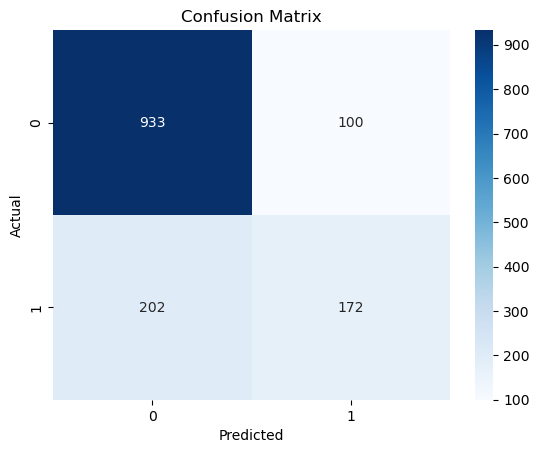

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

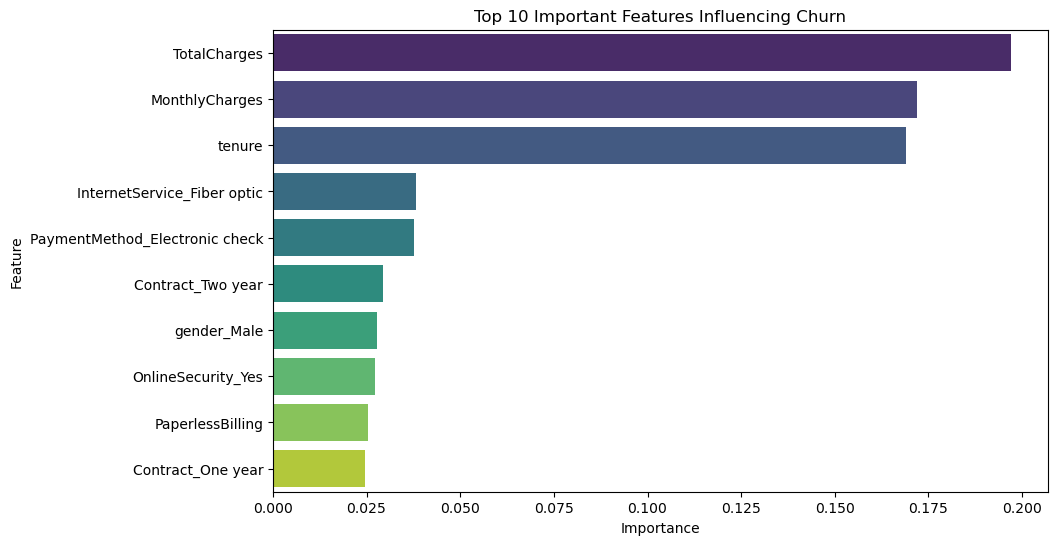

In [29]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for sorting
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), hue='Feature', palette='viridis', legend=False)
plt.title("Top 10 Important Features Influencing Churn")
plt.show()

In [30]:
pip install shap

In [31]:
X_train.dtypes[X_train.dtypes == 'object']

Series([], dtype: object)

In [32]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [33]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [34]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Force all data to be numeric (very important!)
X_encoded = X_encoded.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 99%|===================| 2798/2814 [02:42<00:00]        

<Figure size 640x480 with 0 Axes>

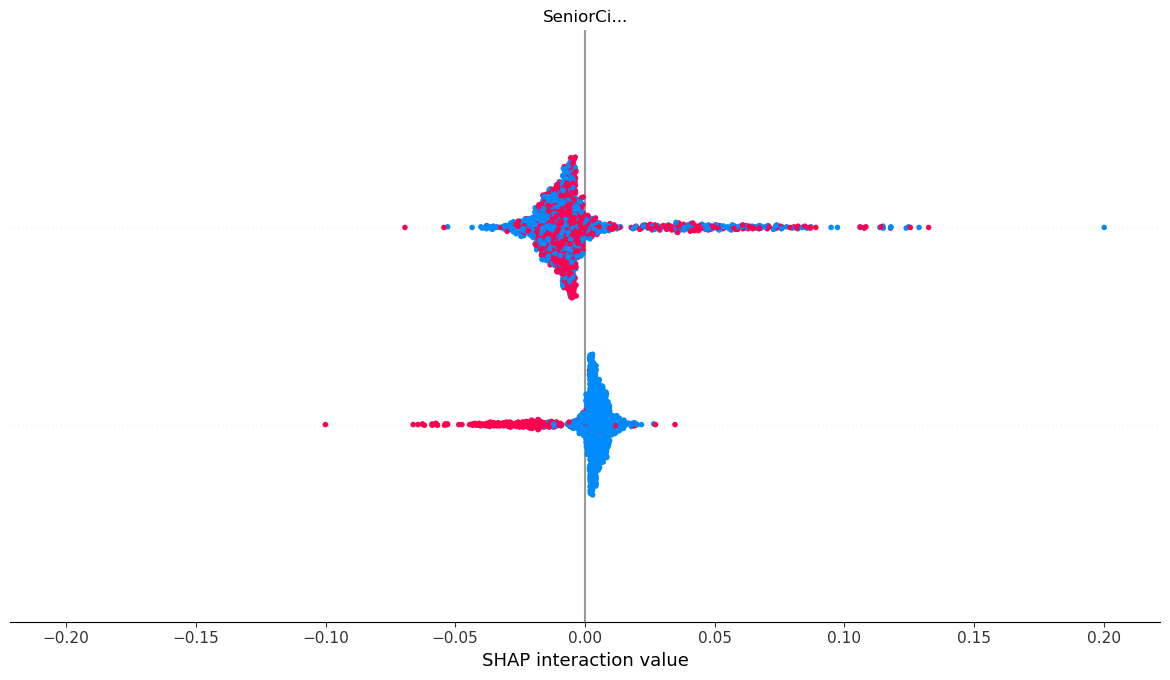

In [35]:
import shap

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(model, X_train)

# Disable additivity check to avoid rounding errors
shap_values = explainer(X_test, check_additivity=False)

# Plot
shap.summary_plot(shap_values, X_test)

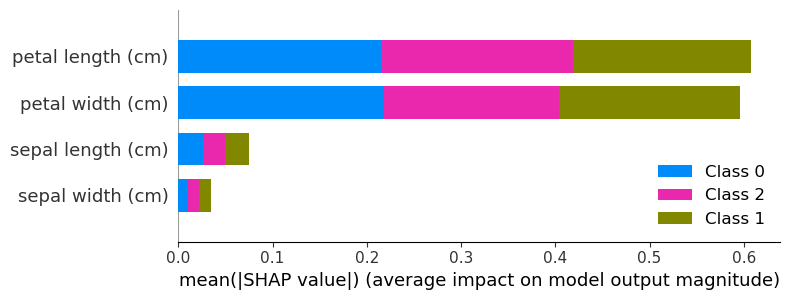

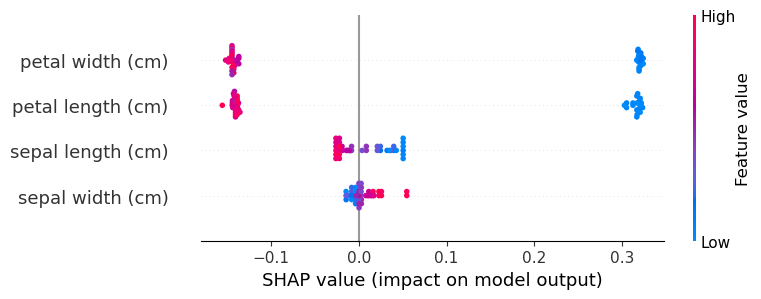

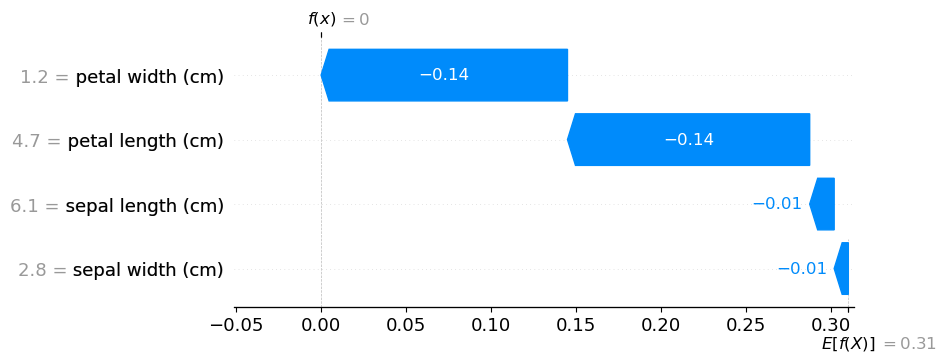

In [37]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize JavaScript visualization
shap.initjs()

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set without additivity check
shap_values = explainer(X_test, check_additivity=False)

# Generate a summary plot for all classes
shap.summary_plot(shap_values, X_test)

# Generate a summary plot for a specific class (e.g., class 0)
shap.summary_plot(shap_values[..., 0], X_test)

# Select an instance to explain (e.g., the first instance in the test set)
i = 0

# Generate a force plot for the selected instance and class 0
shap.plots.force(
    explainer.expected_value[0],
    shap_values[i].values[:, 0],
    X_test.iloc[i],
    feature_names=X_test.columns
)

# Generate a waterfall plot for the selected instance and class 0
shap.plots.waterfall(shap_values[i, :, 0])
